# HW1

Make a duplicate of this notebook, save it to your disk (just like we did in class) and make all changes in your notebook

After the task is completed, there are two steps that need to be taken so that I can receive it

1. Open access for mail gsogoyan98@gmail.com and mmorozova20041999@gmail.com
2. Send a link to your notebook by mail to gsogoyan98@gmail.com and mmorozova20041999@gmail.com. The letter's topic should be Skoltech2023 Neuro HW2 [Your last name]

You can ask for help your fellow students , but if you do, do not copy paste the code!

Before you start the task, I recommend that you sit and watch the notebook that you and I sorted out in class.

In [ ]:
#your code
!pip install mne 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Upload all relevant libraries mne, matplotlib.pyplot,numpy

In [ ]:
#Import libraries
import mne
from mne.preprocessing import ICA
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew , variation
from scipy.signal import welch
import pandas as pd

Upload this [file](https://drive.google.com/file/d/1ujpA_h3xXRv6nbR3Jle-ZTGV3yFAcO2O/view?usp=sharing) to your disk 

<p> Upload all necessary libraries to be able to extact data drom google drive

In [ ]:
#Upload file to disk
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In [ ]:
path='/content/gdrive//My Drive/Sk/' #Здесь как раз нужно указать путь до папки в которой нахожится файл
name='D022_locMMNn.EDF'

raw_data=mne.io.read_raw_edf(path+name, preload=True, stim_channel='ID') #stim_channel название канала, в котором содержатся метки событий, если нам это известно

Extracting EDF parameters from /content/gdrive/My Drive/Sk/D022_locMMNn.EDF...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-10-ac4ec70fec68>:4: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG 33-Ref'}. Applying running numbers for duplicates.
  raw_data=mne.io.read_raw_edf(path+name, preload=True, stim_channel='ID') #stim_channel название канала, в котором содержатся метки событий, если нам это известно


Reading 0 ... 213749  =      0.000 ...   854.996 secs...


In [ ]:
raw_data

<RawEDF | D022_locMMNn.EDF, 36 x 213750 (855.0 s), ~58.7 MB, data loaded>

## Upload all data into environment

Upload your data to the colab.

Remember, in order to do this, you must know in which directory (sequence of folders) your raw data file is located. Specify the path to the file and the name of the file to do this.

Remember that the path to the file on google drive must start with /content/gdrive//My Drive/

Show what the data looks like between 256 and 266 seconds. To do this, you need the plot() function called on your raw data. See [here] how to use the function correctly to display the desired range (https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.plot)

Using matplotlib as 2D backend.


/usr/local/lib/python3.8/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


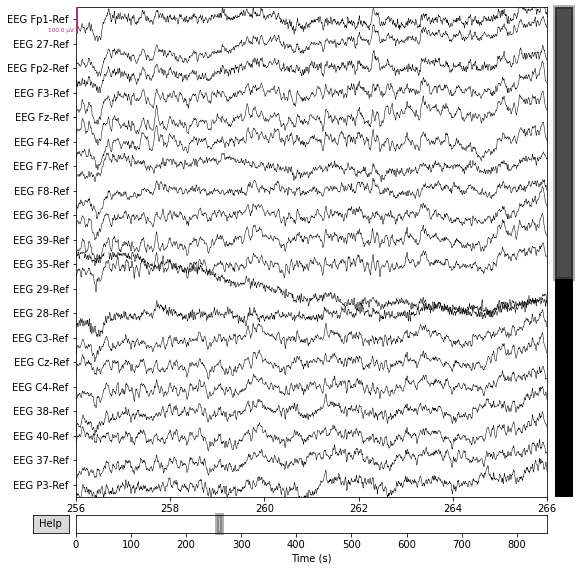

In [ ]:
import matplotlib.pyplot as plt

#plot the desired range
raw_data.plot(start=256, duration=10, scalings={"eeg": 50e-6})
plt.show()

In [ ]:
raw_data.info #Выводим основную информацию о нашей записи 

<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-Ref, EEG 27-Ref, EEG Fp2-Ref, EEG F3-Ref, EEG Fz-Ref, ...
 chs: 35 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2020-08-19 18:00:18 UTC
 nchan: 36
 projs: []
 sfreq: 250.0 Hz
>

In [ ]:
raw_data.info['sfreq'] #Выводим информацию о частоте дискретизации

250.0

In [ ]:
raw_data.ch_names #Выводим названия каналов

['EEG Fp1-Ref',
 'EEG 27-Ref',
 'EEG Fp2-Ref',
 'EEG F3-Ref',
 'EEG Fz-Ref',
 'EEG F4-Ref',
 'EEG F7-Ref',
 'EEG F8-Ref',
 'EEG 36-Ref',
 'EEG 39-Ref',
 'EEG 35-Ref',
 'EEG 29-Ref',
 'EEG 28-Ref',
 'EEG C3-Ref',
 'EEG Cz-Ref',
 'EEG C4-Ref',
 'EEG 38-Ref',
 'EEG 40-Ref',
 'EEG 37-Ref',
 'EEG P3-Ref',
 'EEG Pz-Ref',
 'EEG P4-Ref',
 'EEG 33-Ref-0',
 'EEG 33-Ref-1',
 'EEG T3-Ref',
 'EEG T4-Ref',
 'EEG T5-Ref',
 'EEG T6-Ref',
 'EEG O1-Ref',
 'EEG Oz-Ref',
 'EEG O2-Ref',
 'EEG Pg2-Cb2',
 'EEG Pg1-Cb2',
 'EEG A1-Ref',
 'EEG A2-Ref',
 'ID']

Draw the location of the sensors using the .plot_sensors() function. For this

1.Delete the following set of channels 'EEG Pg1-Cb2','EEG Pg2-Cb2','EEG A1-Ref','EEG A2-Ref'

2.Connect to data mounting with standard1020 system. To be able to do this, you will also need to use a dictionary to rename channels. I wrote it into the chan_dict variable

In [ ]:
raw_data.drop_channels(['EEG Pg1-Cb2','EEG Pg2-Cb2','EEG A1-Ref','EEG A2-Ref']) #Удаляем не нужные каналы

<RawEDF | D022_locMMNn.EDF, 32 x 213750 (855.0 s), ~52.2 MB, data loaded>

In [ ]:
ch=raw_data.ch_names
ch

['EEG Fp1-Ref',
 'EEG 27-Ref',
 'EEG Fp2-Ref',
 'EEG F3-Ref',
 'EEG Fz-Ref',
 'EEG F4-Ref',
 'EEG F7-Ref',
 'EEG F8-Ref',
 'EEG 36-Ref',
 'EEG 39-Ref',
 'EEG 35-Ref',
 'EEG 29-Ref',
 'EEG 28-Ref',
 'EEG C3-Ref',
 'EEG Cz-Ref',
 'EEG C4-Ref',
 'EEG 38-Ref',
 'EEG 40-Ref',
 'EEG 37-Ref',
 'EEG P3-Ref',
 'EEG Pz-Ref',
 'EEG P4-Ref',
 'EEG 33-Ref-0',
 'EEG 33-Ref-1',
 'EEG T3-Ref',
 'EEG T4-Ref',
 'EEG T5-Ref',
 'EEG T6-Ref',
 'EEG O1-Ref',
 'EEG Oz-Ref',
 'EEG O2-Ref',
 'ID']

In [ ]:
ch

['EEG Fp1-Ref',
 'EEG 27-Ref',
 'EEG Fp2-Ref',
 'EEG F3-Ref',
 'EEG Fz-Ref',
 'EEG F4-Ref',
 'EEG F7-Ref',
 'EEG F8-Ref',
 'EEG 36-Ref',
 'EEG 39-Ref',
 'EEG 35-Ref',
 'EEG 29-Ref',
 'EEG 28-Ref',
 'EEG C3-Ref',
 'EEG Cz-Ref',
 'EEG C4-Ref',
 'EEG 38-Ref',
 'EEG 40-Ref',
 'EEG 37-Ref',
 'EEG P3-Ref',
 'EEG Pz-Ref',
 'EEG P4-Ref',
 'EEG 33-Ref-0',
 'EEG 33-Ref-1',
 'EEG T3-Ref',
 'EEG T4-Ref',
 'EEG T5-Ref',
 'EEG T6-Ref',
 'EEG O1-Ref',
 'EEG Oz-Ref',
 'EEG O2-Ref',
 'ID']

In [ ]:
raw_data.ch_names

['EEG Fp1-Ref',
 'EEG 27-Ref',
 'EEG Fp2-Ref',
 'EEG F3-Ref',
 'EEG Fz-Ref',
 'EEG F4-Ref',
 'EEG F7-Ref',
 'EEG F8-Ref',
 'EEG 36-Ref',
 'EEG 39-Ref',
 'EEG 35-Ref',
 'EEG 29-Ref',
 'EEG 28-Ref',
 'EEG C3-Ref',
 'EEG Cz-Ref',
 'EEG C4-Ref',
 'EEG 38-Ref',
 'EEG 40-Ref',
 'EEG 37-Ref',
 'EEG P3-Ref',
 'EEG Pz-Ref',
 'EEG P4-Ref',
 'EEG 33-Ref-0',
 'EEG 33-Ref-1',
 'EEG T3-Ref',
 'EEG T4-Ref',
 'EEG T5-Ref',
 'EEG T6-Ref',
 'EEG O1-Ref',
 'EEG Oz-Ref',
 'EEG O2-Ref',
 'ID']

In [ ]:
dict_ch={'EEG Fp1-Ref': 'Fp1', 'EEG 27-Ref':'Fpz', 'EEG Fp2-Ref':'Fp2', 'EEG F3-Ref':'F3',
 'EEG Fz-Ref':'Fz', 'EEG F4-Ref':'F4', 'EEG F7-Ref':'F7', 'EEG F8-Ref':'F8', 'EEG 36-Ref':'FC3',
 'EEG 39-Ref':'FCz', 'EEG 35-Ref':'FC4', 'EEG 29-Ref':'FT7', 'EEG 28-Ref':'FT8', 'EEG C3-Ref':'C3',
 'EEG Cz-Ref':'Cz', 'EEG C4-Ref':'C4', 'EEG 38-Ref':'CP3', 'EEG 40-Ref':'CPz', 'EEG 37-Ref':'CP4',
 'EEG P3-Ref':'P3', 'EEG Pz-Ref':'Pz', 'EEG P4-Ref':'P4', 'EEG 33-Ref-0':'TP7', 'EEG 33-Ref-1':'TP8',
 'EEG T3-Ref':'T3', 'EEG T4-Ref':'T4', 'EEG T5-Ref':'T5', 'EEG T6-Ref':'T6', 'EEG O1-Ref':'O1',
 'EEG Oz-Ref':'Oz', 'EEG O2-Ref':'O2'} #Создадим словарик соответствий старого названия, новому

raw_data.rename_channels(dict_ch)# Вызовем функцию, которая поменяет старые названия каналов на новые

<RawEDF | D022_locMMNn.EDF, 32 x 213750 (855.0 s), ~52.2 MB, data loaded>

In [ ]:
raw_data.ch_names #Проверяем. Успех!

['Fp1',
 'Fpz',
 'Fp2',
 'F3',
 'Fz',
 'F4',
 'F7',
 'F8',
 'FC3',
 'FCz',
 'FC4',
 'FT7',
 'FT8',
 'C3',
 'Cz',
 'C4',
 'CP3',
 'CPz',
 'CP4',
 'P3',
 'Pz',
 'P4',
 'TP7',
 'TP8',
 'T3',
 'T4',
 'T5',
 'T6',
 'O1',
 'Oz',
 'O2',
 'ID']

In [ ]:
raw_data.set_montage('standard_1020') #Пробуем еще раз добавить к описанию нашей записи описание монтажа

<RawEDF | D022_locMMNn.EDF, 32 x 213750 (855.0 s), ~52.2 MB, data loaded>

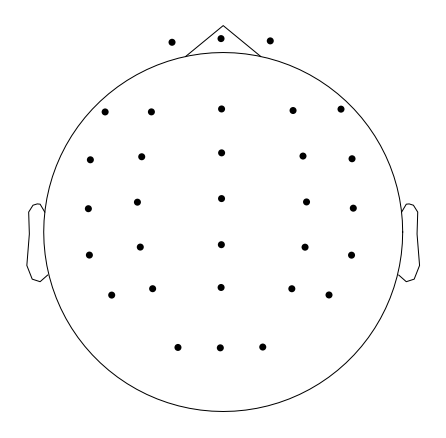

In [ ]:
raw_data.plot_sensors( ) #Electrode position
plt.show()

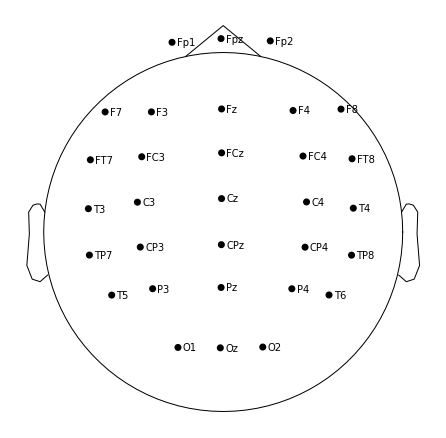

In [ ]:
raw_data.plot_sensors(show_names=True ) #Посмотрим, как расположились наши электроды и провирим названия каналов
plt.show()

## Epoch extraction

Retrieve information about labels using the find_events() function

In [ ]:
raw_data['ID'][0].shape

(1, 213750)

In [ ]:
raw_data['ID'][1]

array([0.00000e+00, 4.00000e-03, 8.00000e-03, ..., 8.54988e+02,
       8.54992e+02, 8.54996e+02])

Draw a label (event) sequence graph

In [ ]:
events=mne.find_events(raw_data) # 

1901 events found
Event IDs: [ 1  2  3 22 33 99]


In [ ]:
events

array([[   260,      0,      1],
       [   366,      0,      1],
       [   458,      0,      1],
       ...,
       [212679,      0,     33],
       [212775,      0,     22],
       [213749,      0,     99]])

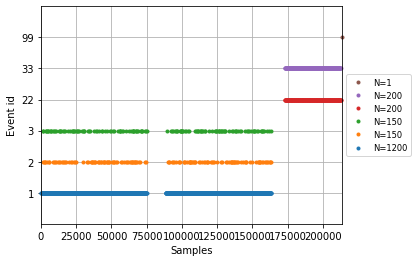

In [ ]:
mne.viz.plot_events(events, show=False)
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


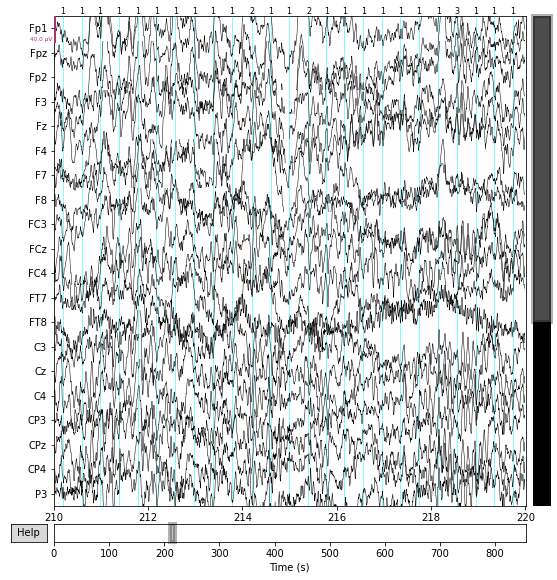

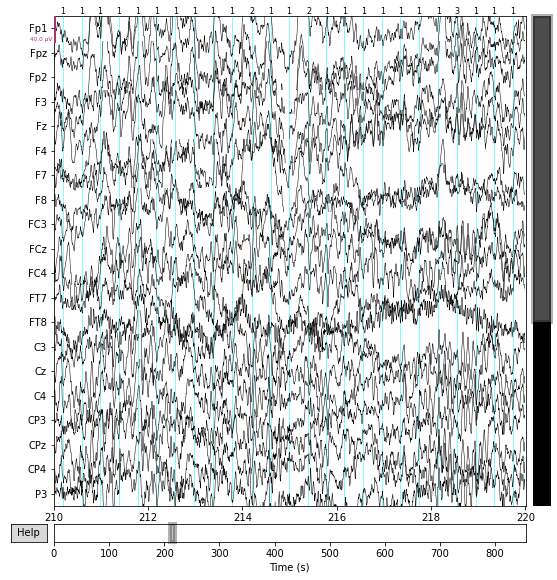

In [ ]:
raw_data.plot(events,start=210) #events shown

In [ ]:
raw_data

<RawEDF | D022_locMMNn.EDF, 32 x 213750 (855.0 s), ~52.2 MB, data loaded>

In [ ]:
raw_data.save(path+'processed_data-raw.fif',overwrite=True) # Аругмент overwrite позволяет нам переписать файл, если файл с таким названием уже существует.

Overwriting existing file.
Writing /content/gdrive/My Drive/Sk/processed_data-raw.fif
Closing /content/gdrive/My Drive/Sk/processed_data-raw.fif
[done]


Below, describe in text how many events you have, of each type. What do you think these events are?

# **Answer:**
 Blue event can represent noise, Orange and green - target stimulus. Left two signals can represent another paradigma of testing, when target stimulus go without noise, thus 3 unique event in total. N=1 represents the end of recording data process

#Preprocessing

Filter the signal from 1 to 45 Hz

/usr/local/lib/python3.8/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


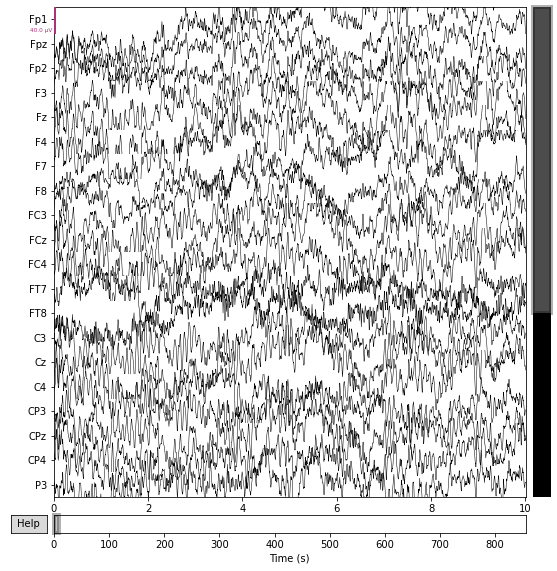

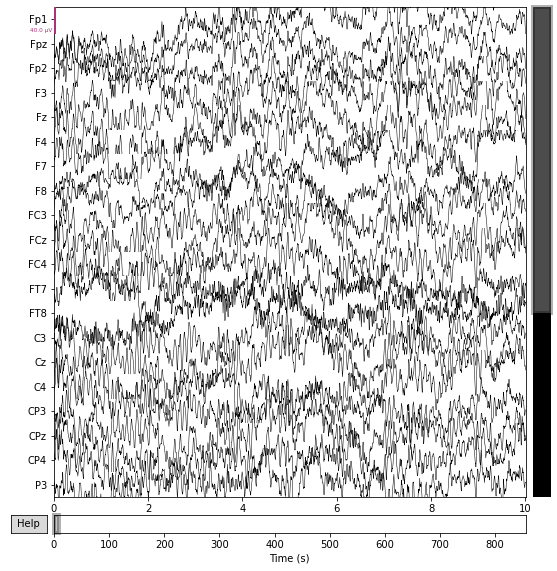

In [ ]:
raw_data.plot()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-12 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-12 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.4s finished
/usr/local/lib/python3.8/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


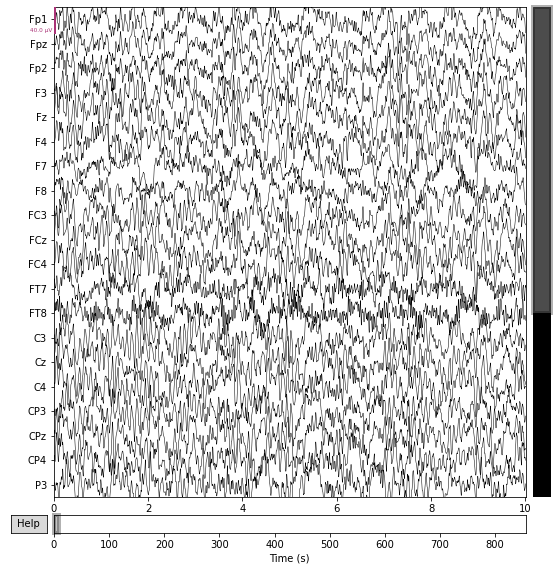

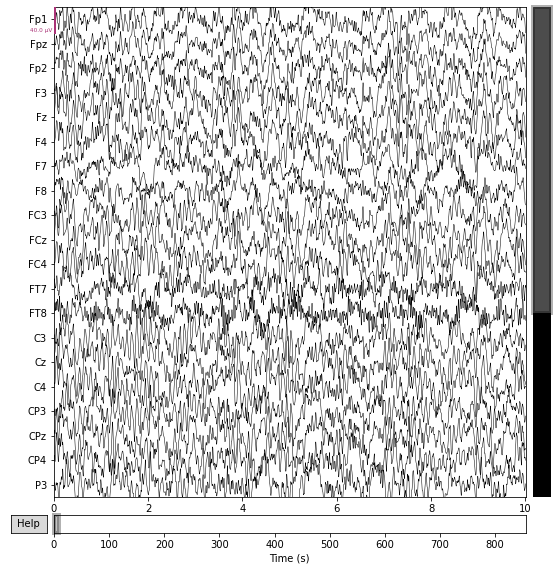

In [ ]:
raw_data=raw_data.filter(1, 45,phase='zero-double') #Фильтруем сигнала в промежутке от 1Гц до 40Гц
raw_data.plot()

/usr/local/lib/python3.8/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


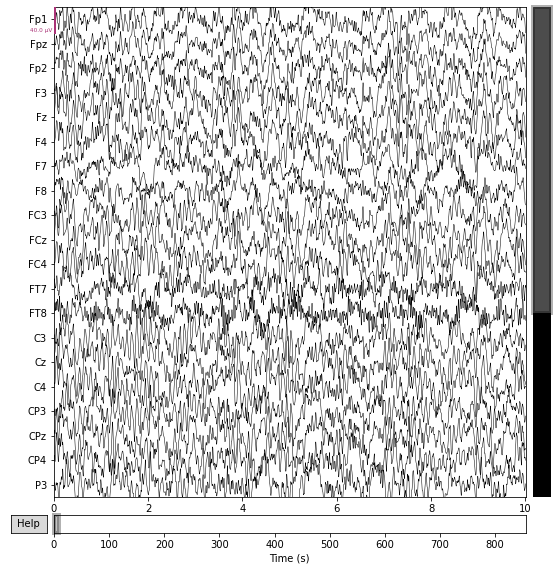

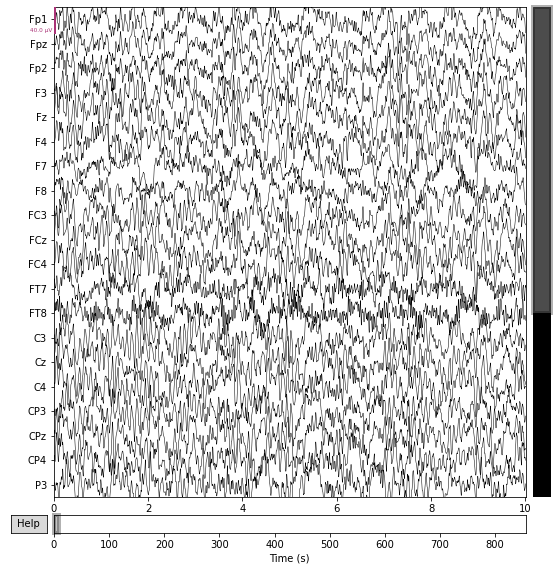

In [ ]:
raw_data.plot()

# Processing

Create an epoch object, name it epochs. Apply a 250e-6 threshold removal and baseline adjustment from 50ms before the event to the time of the event.
<p>The epoch interval should show activity between 100ms before the event and 400ms after the event.
<p> Make epochs only for events with codes 1,2,3, we are not interested in the rest.

In [ ]:
events #The first column is the time frame in which the event occurred
#The second column is the code of the previous event, often it is not important
#The third column is the code of the event that happened

array([[   260,      0,      1],
       [   366,      0,      1],
       [   458,      0,      1],
       ...,
       [212679,      0,     33],
       [212775,      0,     22],
       [213749,      0,     99]])

In [ ]:
baseline=(-0.05, 0) # baseline setting
threshold=250e-6
epochs_all = mne.Epochs(raw_data, events, event_id=[1,2,3], # Коды событий, которые будут взяты в анализ
                                            tmin=-0.1, tmax=0.4, preload=True, # Временной интервал вокруг события, который будет взял для анализа
                                            baseline=baseline, 
                                            reject=dict(eeg=threshold))
    

Not setting metadata
1500 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1500 events and 126 original time points ...
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
3 bad epochs dropped


In [ ]:
epochs_all

<Epochs |  1497 events (all good), -0.1 - 0.4 sec, baseline -0.05 – 0 sec, ~46.1 MB, data loaded,
 '1': 1197
 '2': 150
 '3': 150>

/usr/local/lib/python3.8/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


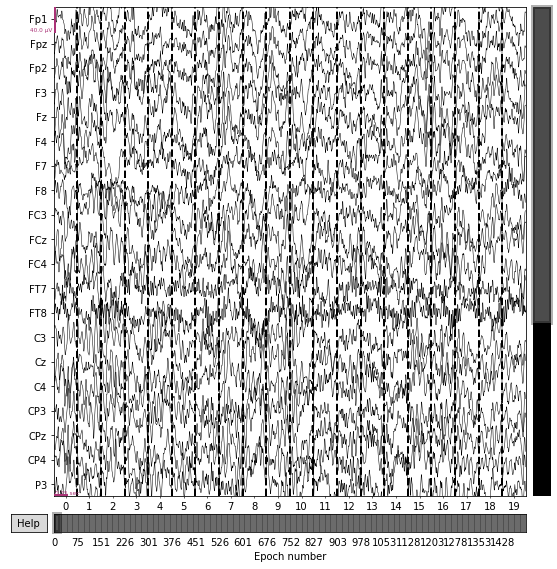

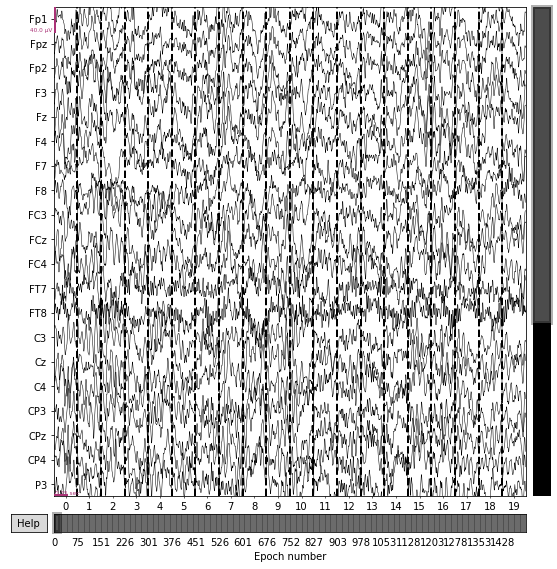

In [ ]:
epochs_all.plot()

Write below
1. How many epochs do you have left in the analysis, for each of the three events
2. How many epochs for each of the three events should have been originally (remember the graph)
3. Explain why there are fewer epochs

# Answer:
1. Left 1497 epochs as total number. 1197 for the 1st event and 150 for the 2nd and 3rd.
2. 1500 events was before applying treshold parameter
3. We cut epochs according to the treshold parameter (value of treshold=250e-6) and exclude three which weren't in area of our interest

## Working with files and graphs

Save your epochs file and name it my_epochs-epo.fif

Make sure you have it on your disk, where you expect to find it

In [ ]:
epochs_all.save(path+'my_epochs-epo.fif')

Calculate the evoked response potential for each type of epoch using the average() function

Write them down in variables evo_1; evo_2; evo_3

In [ ]:
epo_1=epochs_all['1']
epo_2=epochs_all['2']
epo_3=epochs_all['3']

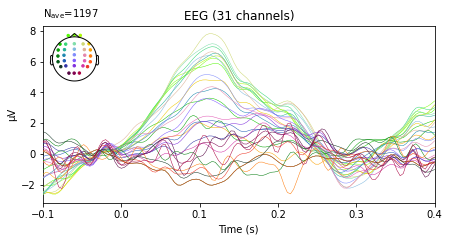

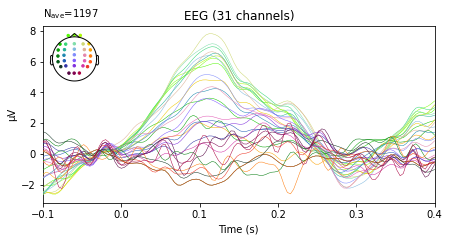

In [ ]:
evo_1=epo_1.average()
evo_1.plot()

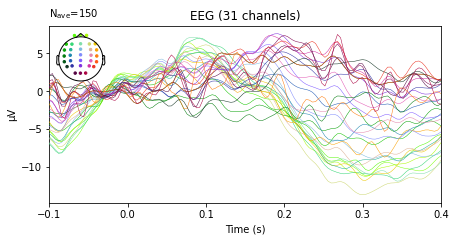

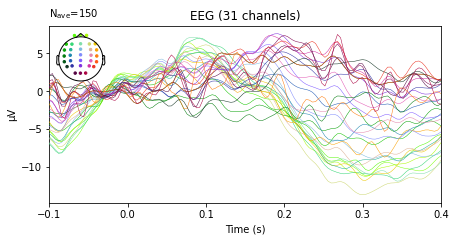

In [ ]:
evo_2=epo_2.average()
evo_2.plot()

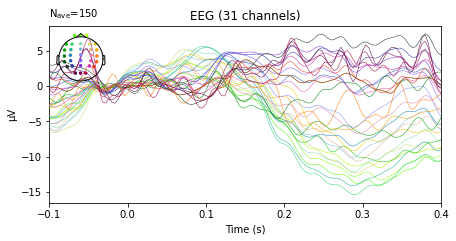

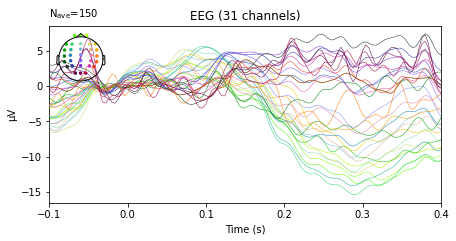

In [ ]:
evo_3=epo_3.average()
evo_3.plot()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


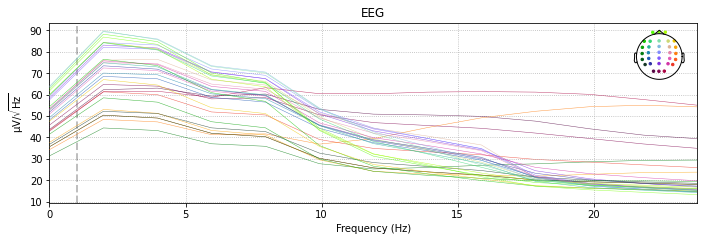

In [ ]:
epochs_all.plot_psd(fmin=0,fmax=25,dB=False)

Look at our notebooks and draw any three graphs with these evoked potentials.

If you make one of the graphs, in the frequency section of the signal, you will get an extra point.

If you make one more of the graphs, in the frequency-time section of the signal, you will get another extra point.

In [ ]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


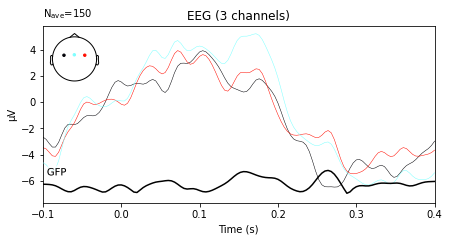

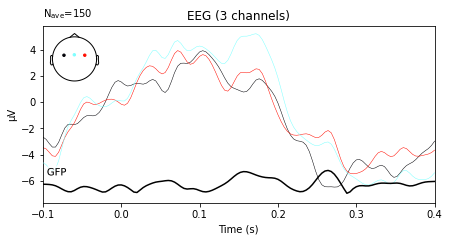

In [ ]:
#Superimpose a trace of the root mean square (RMS) of the signal across channels by passing gfp=True
evo_2.plot(picks=['C3','C4','Cz'], spatial_colors=True, gfp=True)

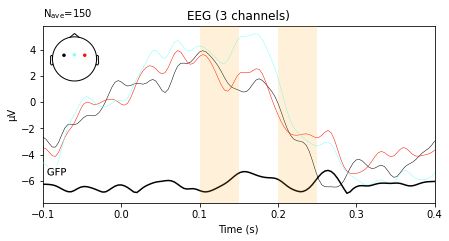

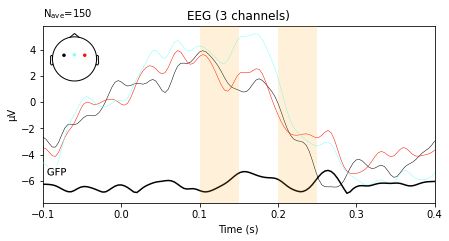

In [ ]:
#Interesting time periods
time_ranges_of_interest = [
    (0.1, 0.15),
    (0.2, 0.25)
   
]
evo_2.plot(
    picks=['C3','C4','Cz'], spatial_colors=True, gfp=True,
    highlight=time_ranges_of_interest
)


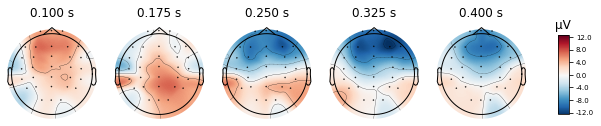

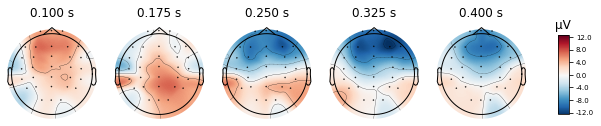

In [ ]:
#Plotting scalp topographies
times = np.linspace(0.1, 0.4, 5)
evo_2.plot_topomap(ch_type='eeg', times=times, colorbar=True)

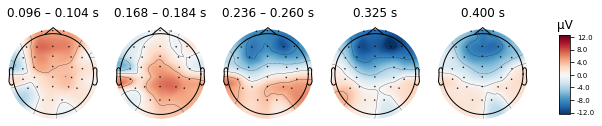

In [ ]:
#It is also possible to pass different time durations to average over for each time point. Passing a value of None will disable averaging for that time point:
averaging_durations = [0.01, 0.02, 0.03, None, None]
fig = evo_2.plot_topomap(
    ch_type='eeg', times=times, average=averaging_durations
)

No projector specified for this dataset. Please consider the method self.add_proj.


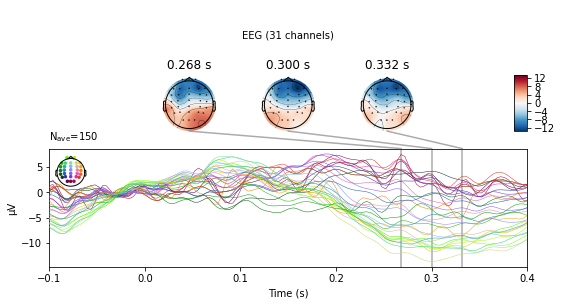

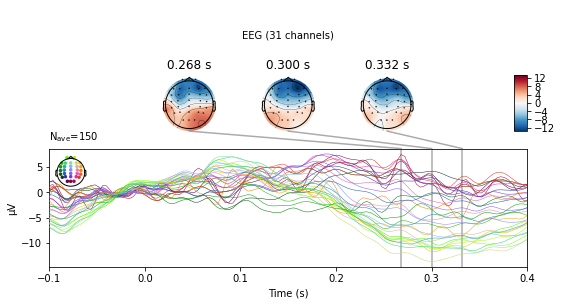

In [ ]:
#Joint plots
evo_2.plot_joint()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


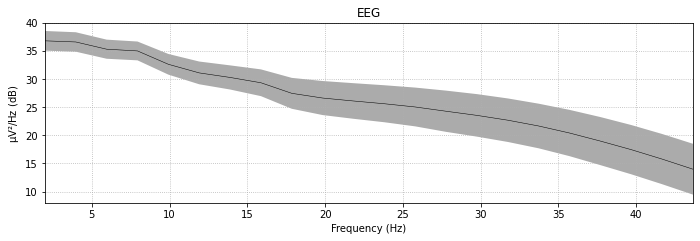

In [ ]:
#Frequency analysis. Check out all channel types by averaging across epochs.
epochs_all.plot_psd(fmin=1., fmax=45., average=True)

NOTE: plot_psd_topomap() is a legacy function. New code should use .compute_psd().plot_topomap().
    Using multitaper spectrum estimation with 7 DPSS windows


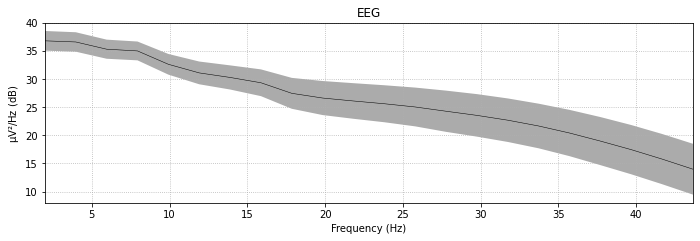

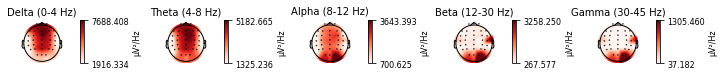

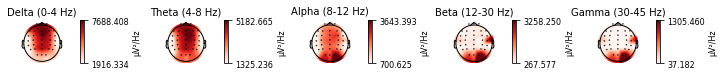

In [ ]:
#spatial distributions of the PSD
epochs_all.plot_psd_topomap(ch_type='eeg', normalize=False)

    Using multitaper spectrum estimation with 7 DPSS windows


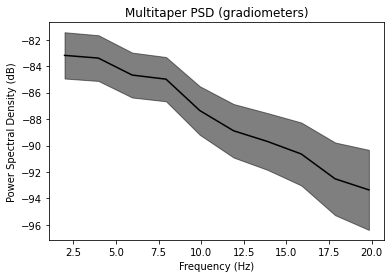

In [ ]:
_, ax = plt.subplots()
spectrum = epochs_all.compute_psd(fmin=1, fmax=20, tmax=.4, n_jobs=None)
# average across epochs first
mean_spectrum = spectrum.average()
psds, freqs = mean_spectrum.get_data(return_freqs=True)
# then convert to dB and take mean & standard deviation across channels
psds = 10 * np.log10(psds)
psds_mean = psds.mean(axis=0)
psds_std = psds.std(axis=0)

ax.plot(freqs, psds_mean, color='k')
ax.fill_between(freqs, psds_mean - psds_std, psds_mean + psds_std,
                color='k', alpha=.5, edgecolor='none')
ax.set(title='Multitaper PSD (gradiometers)', xlabel='Frequency (Hz)',
       ylabel='Power Spectral Density (dB)')
plt.show()

Effective window size : 0.504 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Effective window size : 0.504 (s)


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.8s finished


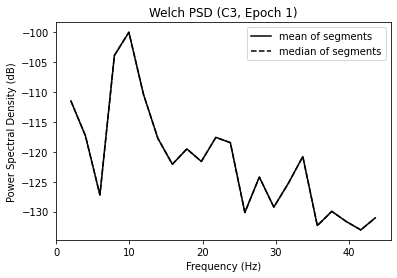

In [ ]:
# Estimate PSDs based on "mean" and "median" averaging for comparison.
kwargs = dict(fmin=1, fmax=45, n_jobs=None, n_fft = 126)
psds_welch_mean, freqs_mean = epochs_all.compute_psd(
    'welch', average='mean', **kwargs).get_data(return_freqs=True)
psds_welch_median, freqs_median = epochs_all.compute_psd(
    'welch', average='median', **kwargs).get_data(return_freqs=True)

# Convert power to dB scale.
psds_welch_mean = 10 * np.log10(psds_welch_mean)
psds_welch_median = 10 * np.log10(psds_welch_median)

# We will only plot the PSD for a single sensor in the first epoch.
ch_name = 'C3'
ch_idx = epochs_all.info['ch_names'].index(ch_name)
epo_idx = 1

_, ax = plt.subplots()
ax.plot(freqs_mean, psds_welch_mean[epo_idx, ch_idx, :], color='k',
        ls='-', label='mean of segments')
ax.plot(freqs_median, psds_welch_median[epo_idx, ch_idx, :], color='k',
        ls='--', label='median of segments')

ax.set(title=f'Welch PSD ({ch_name}, Epoch {epo_idx})',
       xlabel='Frequency (Hz)', ylabel='Power Spectral Density (dB)')
ax.legend(loc='upper right')
plt.show()

In [ ]:
welch_unagg = epochs_all.compute_psd('welch', average=None, **kwargs)
print(welch_unagg.shape)

Effective window size : 0.504 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


(1497, 31, 22, 1)


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.0s finished


# **Time-frequency analysis: power and inter-trial coherence**

In [ ]:
from mne.time_frequency import tfr_morlet
freqs = np.logspace(*np.log10([1, 10]), num=8)
n_cycles = freqs / 10  # different number of cycle per frequency
power, itc = tfr_morlet(epochs_all, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=None)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:   10.9s finished


# **Inspect power**

Applying baseline correction (mode: logratio)


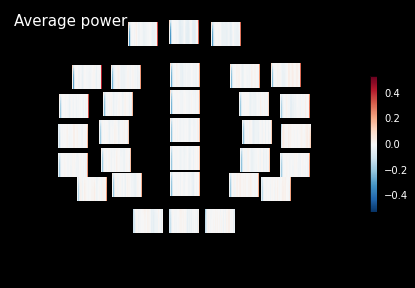

Applying baseline correction (mode: logratio)


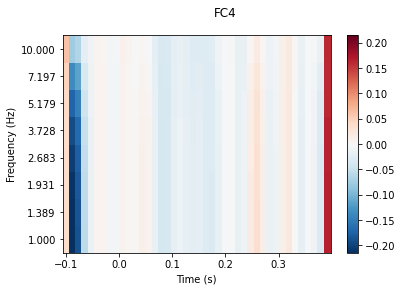

[<Figure size 432x288 with 2 Axes>]

In [ ]:
power.plot_topo(baseline=(-0.05, 0), mode='logratio', title='Average power')
power.plot([10], baseline=(-0.05, 0), mode='logratio', title=power.ch_names[10])

Below, share any conclusions on the resulting graphs.

# Conclusions:
1. for EEG root mean square (RMS) of the signal across channels plots the global field power (an average-referenced RMS). In this work I manually select the area of interest from 0.1 to 0.15 sec. For this area the highest value of RMS isn't higher than 4mV
2. From scalp topographies and power plots can be seen that mostly brain activity lies in the lange between -8mV and -4mV.
3. From spatial distributions of the PSD is seen that Delta activity is the highest, this activity on electroencephalogram (EEG) is considered as a biomarker of homeostatic sleep drive.
4. PSD conclusion -> In our case, mean and median are the same, as the EEG data has a normal distribution. 
5. The average power in EEG data is between 0 and -0.2 mostly for all EEG channels. This range is indicative of normal EEG activity, and is consistent with the ranges seen in other studies

# References:
1. https://mne.tools/stable/auto_tutorials/evoked/20_visualize_evoked.html#sphx-glr-auto-tutorials-evoked-20-visualize-evoked-py
2. https://mne.tools/stable/auto_tutorials/time-freq/index.html